<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Logo_SA.png"></a>

# seaborn: statistical data visualization

Hi guys,<br>
Welcome back to the seaborn: a statistical data visualization section. We are going to talk about Matrix plots in this lecture. <br>

## Matrix Plots

Seaborn's matrix plots, such as, `"heatmap()"` allow us to plot the data as color-encoded matrices, whereas `"clustermap()"`can be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's learn with examples:

In [1]:
# Importing required libraries and loading dataets
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

C:\Users\Girijesh\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# flights dataset is tells the no. of passengers flew in a month of some year.
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### `heatmap()`
* `heatmap()` actually plot rectangular data as a color-encoded matrix and is a primary way of showing matrix plot.
* In order for a `heatmap()` to work properly, our data should already be in a matrix form, the `sns.heatmap` function basically just colors it in for us. 
* The matrix form of the data mean the `index name` and the `column name` match up so that the cell value actually indicates something that us relevant to both of those names.  <br>

For instance, if we take a look at our `"tips"` data frame, we have a column `total_bill` which is some sort of a label, if we look at one of its value, say 16.99 at first place. The row is not actually the variable.<br>
In order to get it into a variable form, we need to have both variables on the columns and rows. We can do this usually through a `pivot table`, or trying to get `correlation` data.  <br> 

Let's try for the correlation data first:

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


using `tips.corr()` we get a matrix form of our data with correlation between the columns and indexes.

In [5]:
# Matrix form for correlation data
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


We simply need to call `heatmap()` on our correlated data, which will color scale with gradient for our data. 

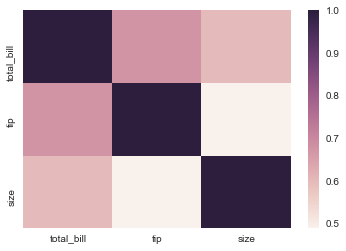

In [6]:
sns.heatmap(tc)

We can change the cmap `cmap='coolwarm'`. The `annot=True` write the data value in each cell on the map!

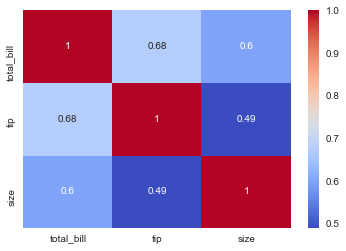

In [7]:
sns.heatmap(tc,cmap='coolwarm',annot=True)

**Let's look at the flights data:** We need to create a pivot table first. <br> Let's take no of passengers as "value", "month" as index and "year" as column. 

In [8]:
pvf = flights.pivot_table(values='passengers',
                                index='month',columns='year')
pvf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


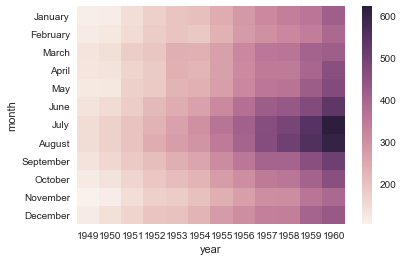

In [9]:
# passing pvflights to the heatmap
sns.heatmap(pvf)

We can chose: <br>
    * cmap = 'magma' -- using different color map of our choice
    * linecoler = 'white' -- to add line between each cell
    * linewidth = 1 -- how thik the line should be

Let's see how the map look like now!

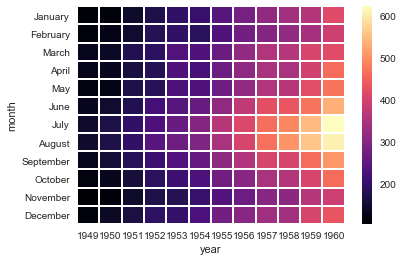

In [10]:
sns.heatmap(pvf,cmap='magma',
            linecolor='white',linewidths=1)
# Annotate each cell with the numeric value using integer formatting:
#sns.heatmap(pvflights,cmap='magma',
#            linecolor='white',linewidths=1, annot=True, fmt="d")

We see the map looks much better now. <br>
* We see that the overall no of passengers increases as we move from 1949 to 1960. This make sense because more people used airplanes with time and more flights were available <br>
* We can also observe that the popular months for travel are usually summer months, Jule, July and August! 

### `clustermap()`

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap where similar groups are close to each other. <br>
For example, let's call the clustermap for the same data "pvflights":

In [11]:
# Just to have a cleaner notebook to avoid warning in clustermap 
import warnings
warnings.filterwarnings('ignore')

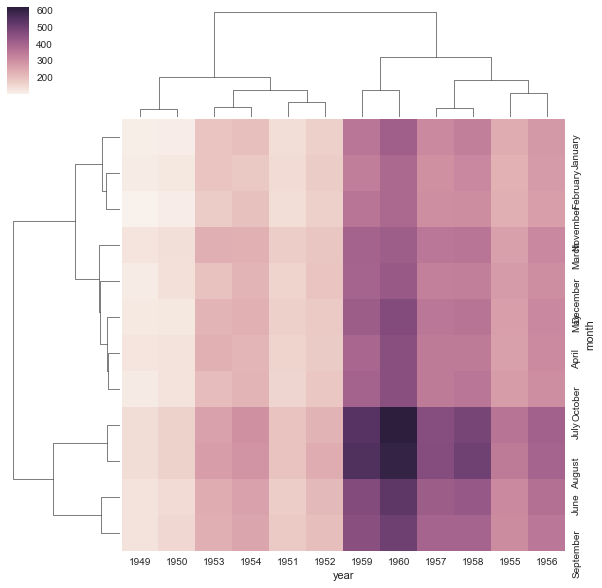

In [12]:
g = sns.clustermap(pvf)

Ignore the warning, its between tow version.<br>
&#9989; Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months). 1959 and 1960 are similar and put besides each other. 

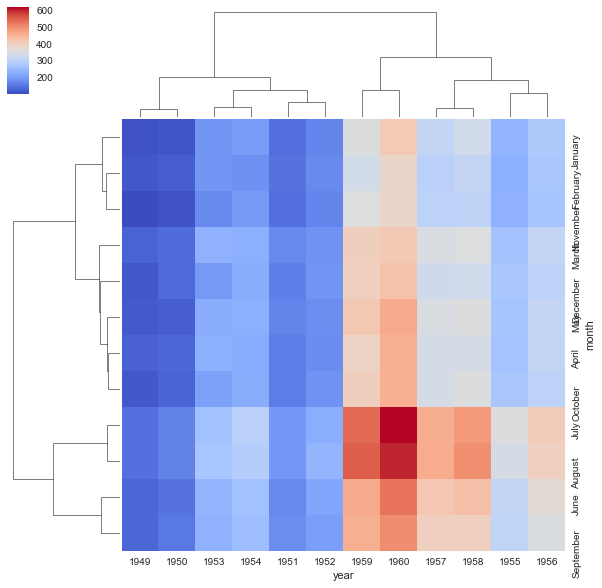

In [13]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvf,cmap='coolwarm')

The clusters are much clearer but we can still see the passengers in the bar from 0 to 600. <br>
We can standardize the scale using **`standard_scale=1`**

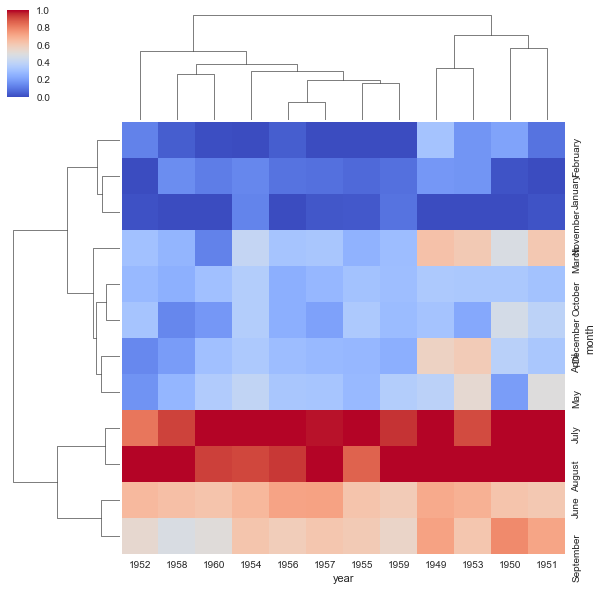

In [14]:
sns.clustermap(pvf,cmap='coolwarm',standard_scale=1)

Based on the normalized scale, we get much better understanding of our data. We see that the the winter months November, January and February are always low passenger months while the summer months with red color are all the time high sale or more passenger months! 

## Excellent work!